In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('scores.csv')
df.head(5)

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
3,Nisal Gamage,1,74.5,63.9,7,0,76.8,1.7,Production-Ready ML Systems,100.0
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1


In [4]:
df = df[df['CourseName'] == 'Foundations of ML']
df.head(5) 

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [6]:
df['Passed'] = df['CapstoneScore'] >= 50
df.head(5)

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore,Passed
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3,False
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8,True
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4,True
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1,False
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2,True


In [9]:
X = df['TotalHours'].values.reshape(-1, 1)
Y = df['Passed'].values

In [10]:
Y

array([False,  True,  True, False,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True,  True,  True, False, False,  True])

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



In [13]:
def compute_cost(y_hat, Y):
    positive_cost = np.sum(Y * np.log(y_hat))
    negative_cost = np.sum((1 - Y) * np.log(1 - y_hat))

    m = len(Y)
    return (-1 / m) * (positive_cost + negative_cost)

In [15]:
def compute_gradient(X, Y, y_hat):
    m = len(Y)
    
    dj_dbeta1 = (1 / m) * X.T.dot(y_hat - Y)
    dj_dbeta0 = (1 / m) * np.sum(y_hat - Y)

    return dj_dbeta0, dj_dbeta1

In [25]:
beta = np.random.randn(2)

beta0 = beta[0]
beta1 = beta[1]

learning_rate = 0.00001
iterations = 10000

In [26]:
cost_history = []

for i in range(iterations):

    
    z = beta0 + X.dot(beta1)
    y_hat = sigmoid(z)

    cost = compute_cost(y_hat, Y)

    dj_dbeta0, dj_dbeta1 = compute_gradient(X, Y, y_hat)

    beta0 =beta0 - learning_rate * dj_dbeta0
    beta1 = beta1 - learning_rate * dj_dbeta1

    cost = compute_cost(y_hat, Y)
    cost_history.append(cost)

    if i % 100 == 0:
        print(f"Iteration {i}: Cost {cost}")
    
    


Iteration 0: Cost 2181.4956739391287
Iteration 100: Cost 2047.4313007353824
Iteration 200: Cost 1913.3671818118976
Iteration 300: Cost 1779.3035559162277
Iteration 400: Cost 1645.2408905822147
Iteration 500: Cost 1511.1801069006203
Iteration 600: Cost 1377.1230320851564
Iteration 700: Cost 1243.0733190863075
Iteration 800: Cost 1109.0383328295648
Iteration 900: Cost 975.0330542699106
Iteration 1000: Cost 841.0882326440458
Iteration 1100: Cost 707.267617846128
Iteration 1200: Cost 573.7055561754968
Iteration 1300: Cost 440.69774836460783
Iteration 1400: Cost 308.98651000282194
Iteration 1500: Cost 181.12171052769065
Iteration 1600: Cost 70.07800469407614
Iteration 1700: Cost 18.237449855763682
Iteration 1800: Cost 8.422542807789338
Iteration 1900: Cost 5.619423560080356
Iteration 2000: Cost 4.337272583519437
Iteration 2100: Cost 3.5975089158143554
Iteration 2200: Cost 3.111537252488923
Iteration 2300: Cost 2.7651080583125354
Iteration 2400: Cost 2.503971378480137
Iteration 2500: Cost 2.

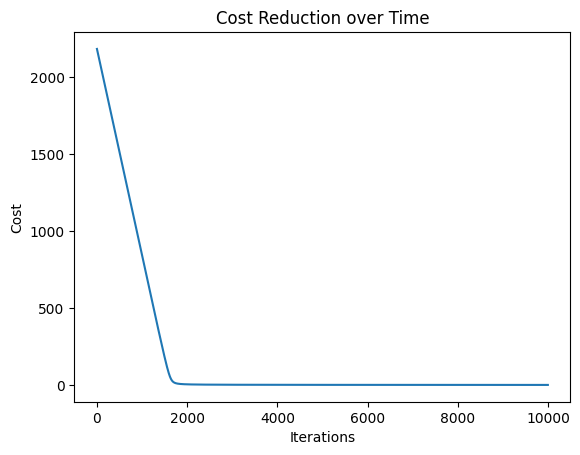

In [27]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")  
plt.title("Cost Reduction over Time")
plt.show()